In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

In [2]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

  
    time=np.arange(0,sig.shape[0])/sr
    
    excursion=max(abs(sig))
    sigNew = sig / excursion
 
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    plt.figure(fig)
  
    plt.subplot(2,1,1)
    
   
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
 
    plt.subplot(2,1,2)
    

    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show

In [200]:
def filterSignal(sig,sr,freq,filtType,order,winSize,specType,fig):
    
    
    if filtType == "low" or filtType == "high":
        filterFreq = freq / (sr / 2)
        
        
    elif filtType == "bandpass" or filtType == "bandstop":
        filterFreq = [freq / (sr / 2), (freq*2) / (sr / 2)]

        
    b, a = sg.butter(order, filterFreq, filtType)
        
        
    filterSignal = sg.filtfilt(b, a, sig)
    
    title = filtType
        
    plotTimeFreq(filterSignal,sr,title,winSize,specType,fig)
    
    return filterSignal

In [210]:
def allFilters(sig,sr,freq,width,order,winSize,specType):
    
    
    sig_lp = filterSignal(sig,sr,freq,'low',order,winSize,specType,'1')
      
        
    sig_hp = filterSignal(sig,sr,freq,'high',order,winSize,specType,'2')
    freq = freq*2
        
    sig_bp = filterSignal(sig,sr,freq,'bandpass',order,winSize,specType,'3')
    filterFreq = [freq - width, freq + width]
        
    sig_bs = filterSignal(sig,sr,freq,'bandstop',order,winSize,specType,'4')
    filterFreq = [freq - width, freq + width]
        
    return sig_lp, sig_hp, sig_bp, sig_bs


/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


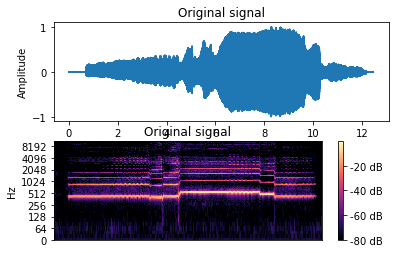

In [211]:
sig , sr = librosa.load('avm.wav')
winSize = 1024 
specType = 'log' 
fig = 1
plotTimeFreq(sig,sr,'Original signal',winSize,specType,fig) 
IPython.display.Audio(data=sig, rate=sr)

/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/rubagherezgher/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecat

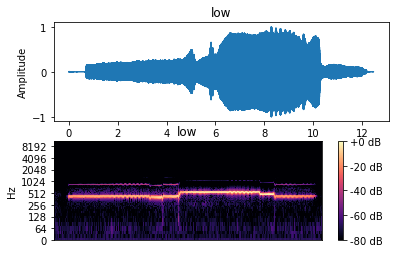

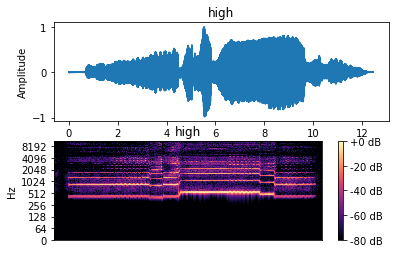

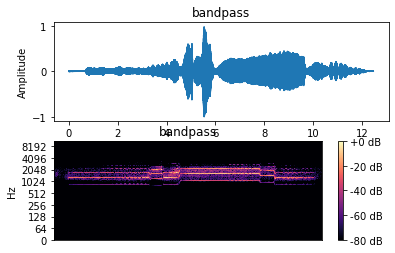

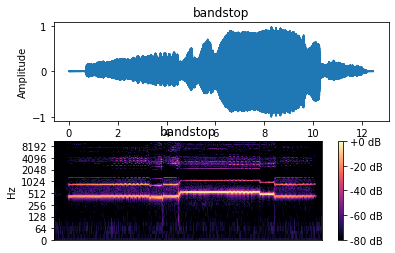

In [212]:
freq = 600
width = 200 
order = 4

sig_lp, sig_hp, sig_bp, sig_bs = allFilters(sig,sr,freq,width,order,winSize,specType)


In [214]:
sig , sr = librosa.load('avm.wav')
IPython.display.Audio(data=sig_lp, rate=sr)

In [216]:
IPython.display.Audio(data=sig_hp, rate=sr)

In [217]:
IPython.display.Audio(data=sig_bp, rate=sr)

In [208]:
IPython.display.Audio(data=sig_bs, rate=sr)